<a href="https://colab.research.google.com/github/jirayuwat12/SuperAI/blob/master/image/IM_Hack1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Kaggle Library

In [ ]:
!pip install -q kaggle

#Mouth Google Drive

mouth your google drive account ***everytime when start VM***

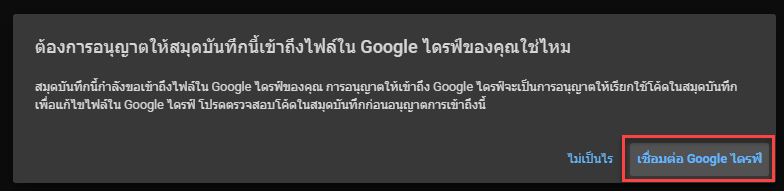

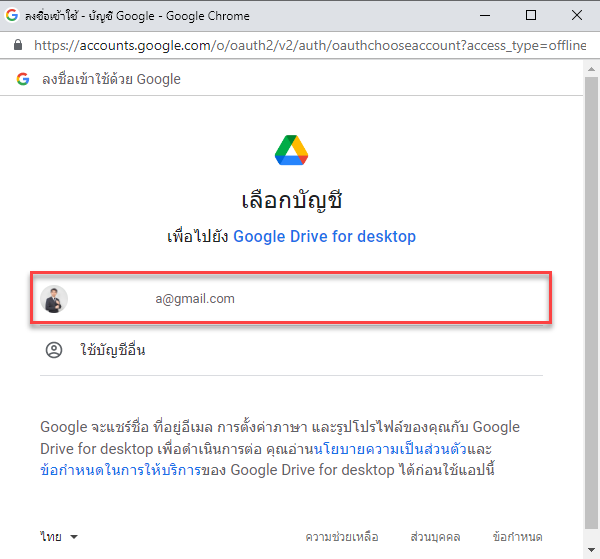

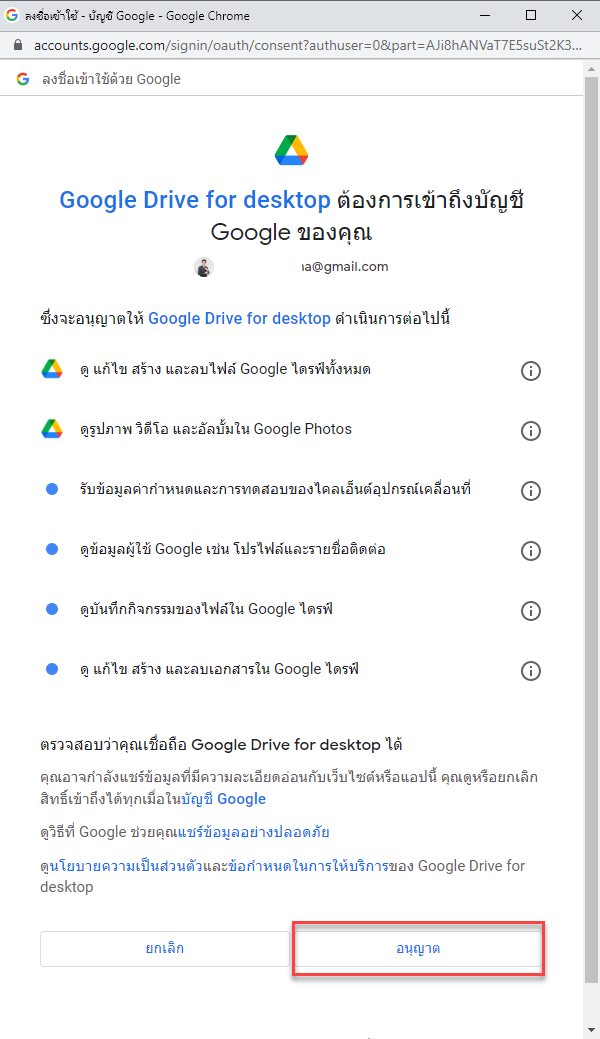

check your mount

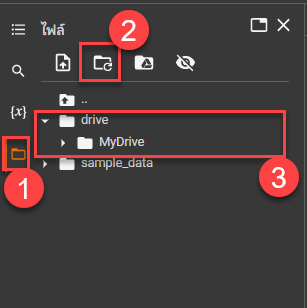

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Kaggle API

***Do only one-time at first***

1 go to https://www.kaggle.com/me/account

2 Click create New API token

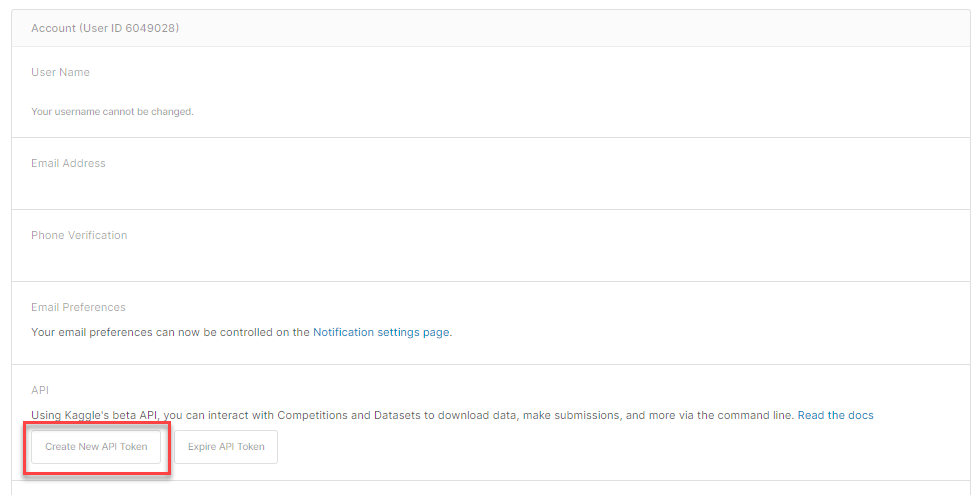


1 login to google drive and create some folder (try create "colab" folder like me)

2 copy kaagle.json which downloaded when create new API token to google drive

3 check file is existing in google drive
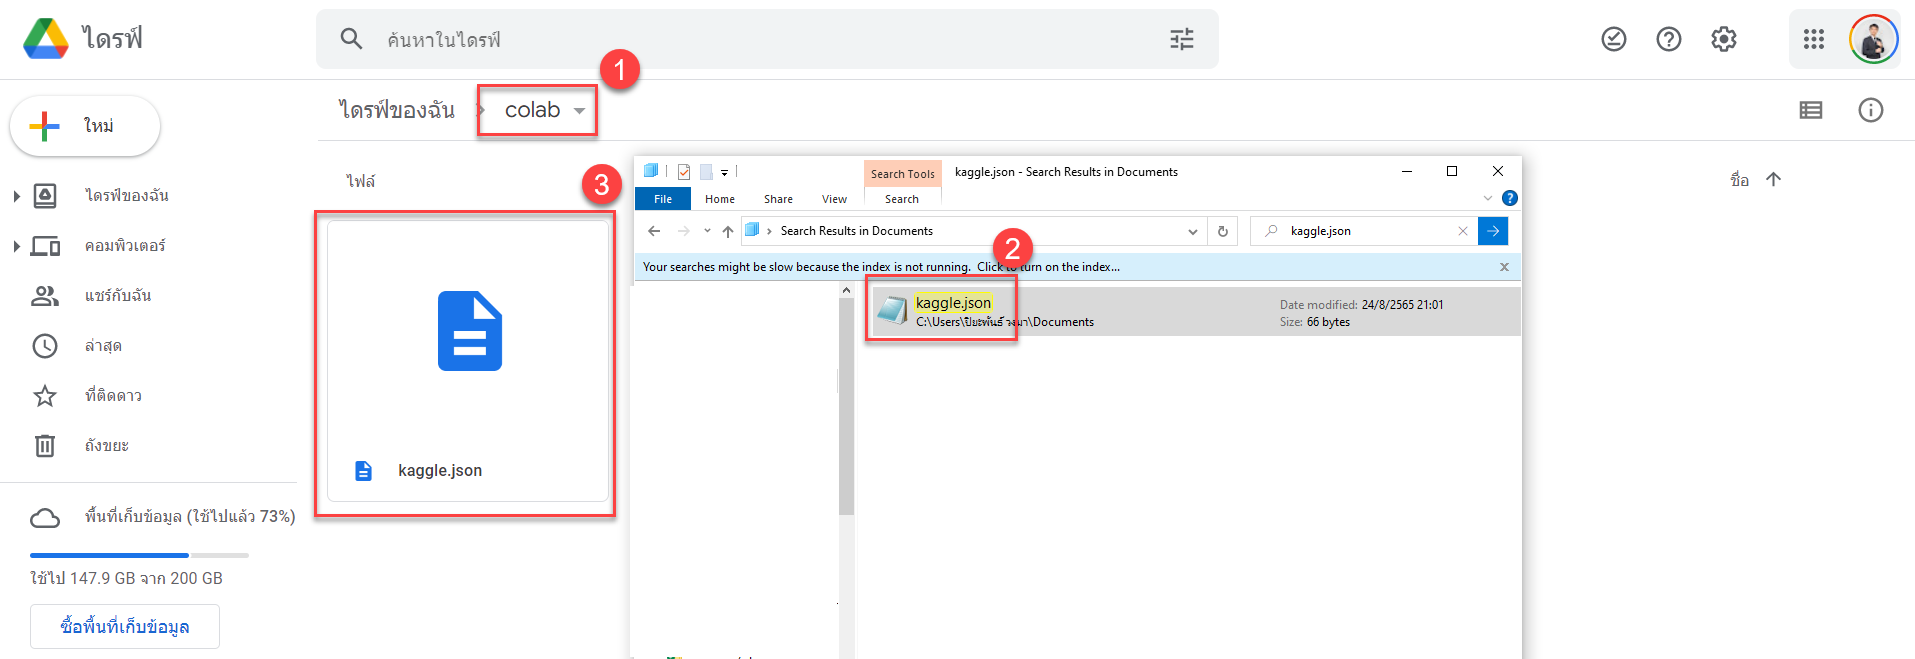

Source mount file is * /content/drive/MyDrive/colab/kaggle.json *

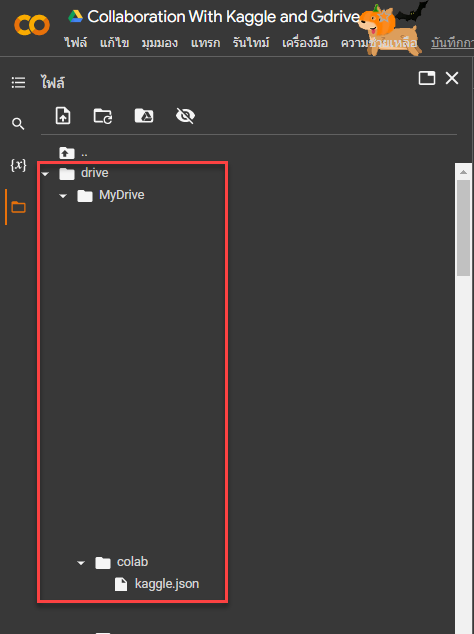

#Download Dataset from Kaggle

please join competition before runscript


https://www.kaggle.com/competitions/hackathon-online-2022-image-processing

In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/colab_resources/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c hackathon-online-2022-image-processing #download competition dataset


ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                               9KB  2022-10-06 08:55:25           7909        260  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset        11KB  2022-09-30 04:05:11           6396        204  1.0              
whenamancodes/students-performance-in-exams                     Students Performance in Exams                  9KB  2022-09-14 15:14:54          11217        203  1.0              
dimitryzub/walmart-coffee-listings-from-500-stores              Walmart Coffee Listings from 50

In [ ]:
# !cp /content/hackathon-online-2022-image-processing.zip /content/drive/MyDrive/colab_resources/hackathon-online-2022-image-processing.zip

#Unzip file

In [ ]:
!unzip /content/hackathon-online-2022-image-processing.zip

Archive:  /content/hackathon-online-2022-image-processing.zip
  inflating: IM_Submit.csv           
  inflating: IM_Test.zipfile         
  inflating: IM_Train.zipfile        


In [ ]:
!mkdir /content/zipfile
!unzip /content/IM_Test.zipfile -d /content/zipfile
!unzip /content/IM_Train.zipfile -d /content/zipfile

Archive:  /content/IM_Test.zipfile
  inflating: /content/zipfile/IM_Test.zipfile  
Archive:  /content/IM_Train.zipfile
  inflating: /content/zipfile/IM_Train.zipfile  


In [ ]:
!mkdir /content/dataset/
!unzip /content/zipfile/IM_Train.zipfile -d /content/dataset
!unzip /content/zipfile/IM_Test.zipfile -d /content/dataset/test
!rm -r /content/zipfile

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
 extracting: /content/dataset/test/IM_Test/IM_Test/5499.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/55.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/550.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5500.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5501.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5502.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5503.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5504.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5505.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5506.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5507.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5508.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5509.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/551.png  
 extracting: /content/dataset/test/IM_Test/IM_Test/5510.png  
 extracting: /con

#Processing

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/IM_Submit.csv')
df.head()

,imageid_boxid,class
0,1_0,NaN
1,2_0,NaN
2,2_1,NaN
3,2_2,NaN
4,3_0,NaN


In [ ]:
df['class'] = 1
df

,imageid_boxid,class
0,1_0,1
1,2_0,1
2,2_1,1
3,2_2,1
4,3_0,1
...,...,...
26027,13067_0,1
26028,13067_1,1
26029,13067_2,1
26030,13068_0,1


In [ ]:
df.to_csv('/content/my_answer.csv',index=False)

In [ ]:
!cp /content/IM_Submit.csv /content/drive/MyDrive/colab/IM_Submit.csv

# look up data

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!ls /content/dataset/train/0

In [ ]:
def bgr_to_gray(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
def gray_to_bgr(img):
    return cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

In [ ]:
sum_w = []
sum_h = []
X_orig = []
y_orig = []
all = 0
import os
for dirname, _, filenames in os.walk('/content/dataset/train'):
    for filename in filenames:
        all +=1
        path = os.path.join(dirname, filename)
        print(dirname[-1],end=' ')
        temp = cv2.imread(path)
        if(temp.shape[1] < 1.2*temp.shape[0]) and temp.shape[1] <250 and temp.shape[0] < 350:
            sum_w.append(temp.shape[1])
            sum_h.append(temp.shape[0])
            temp = cv2.resize(temp,(32,32))
            temp = bgr_to_gray(temp)
            X_orig += [temp]
            y_orig += [int(dirname[-1])]

7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 

73257 68102 68102
mean 16.472673342926786 33.78079938915157


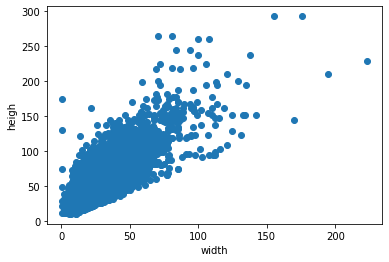

In [ ]:
print(all,len(sum_w),len(sum_h))
plt.scatter(sum_w,sum_h)
print("mean",np.mean(sum_w),np.mean(sum_h))
plt.xlabel("width")
plt.ylabel("heigh")
plt.show()

In [ ]:
X = np.array(X_orig)
y = np.array(y_orig)

In [ ]:
y

array([7, 7, 7, ..., 6, 6, 6])

# model lenet

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train = X_train[:,:,:,None]
X_test = X_test[:,:,:,None]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(47671, 32, 32, 1) (20431, 32, 32, 1) (47671,) (20431,)


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6,5,activation='relu',input_shape=(32,32,1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(16,5,activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(120,5,activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_5 (Flatten)         (None, 120)              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=50,batch_size=1024,validation_data=(X_test,y_test))

Epoch 1/50
47/47 [==============================] - 1s 16ms/step - loss: 1.3277e-05 - accuracy: 1.0000 - val_loss: 3.7675 - val_accuracy: 0.8723
Epoch 2/50
47/47 [==============================] - 1s 13ms/step - loss: 1.2823e-05 - accuracy: 1.0000 - val_loss: 3.7770 - val_accuracy: 0.8722
Epoch 3/50
47/47 [==============================] - 1s 13ms/step - loss: 1.2382e-05 - accuracy: 1.0000 - val_loss: 3.7832 - val_accuracy: 0.8723
Epoch 4/50
47/47 [==============================] - 1s 13ms/step - loss: 1.1787e-05 - accuracy: 1.0000 - val_loss: 3.7918 - val_accuracy: 0.8722
Epoch 5/50
47/47 [==============================] - 1s 11ms/step - loss: 1.1301e-05 - accuracy: 1.0000 - val_loss: 3.7986 - val_accuracy: 0.8724
Epoch 6/50
47/47 [==============================] - 1s 13ms/step - loss: 1.0928e-05 - accuracy: 1.0000 - val_loss: 3.8080 - val_accuracy: 0.8723
Epoch 7/50
47/47 [==============================] - 1s 13ms/step - loss: 1.0512e-05 - accuracy: 1.0000 - val_loss: 3.8144 - val_ac

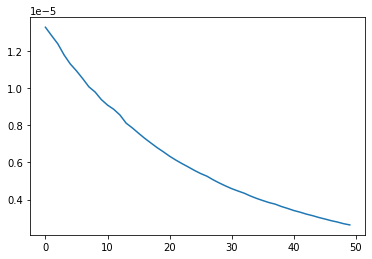

In [ ]:
plt.plot(history.history['loss'])
plt.show()

#Submission to Kaggle

In [ ]:
import json 
!ls /content/dataset/test/IM_Test/IM_Test

10000.png  11682.png  15.png	3280.png  4961.png  6641.png  8321.png
10001.png  11683.png  1600.png	3281.png  4962.png  6642.png  8322.png
10002.png  11684.png  1601.png	3282.png  4963.png  6643.png  8323.png
10003.png  11685.png  1602.png	3283.png  4964.png  6644.png  8324.png
10004.png  11686.png  1603.png	3284.png  4965.png  6645.png  8325.png
10005.png  11687.png  1604.png	3285.png  4966.png  6646.png  8326.png
10006.png  11688.png  1605.png	3286.png  4967.png  6647.png  8327.png
10007.png  11689.png  1606.png	3287.png  4968.png  6648.png  8328.png
10008.png  1168.png   1607.png	3288.png  4969.png  6649.png  8329.png
10009.png  11690.png  1608.png	3289.png  496.png   664.png   832.png
1000.png   11691.png  1609.png	328.png   4970.png  6650.png  8330.png
10010.png  11692.png  160.png	3290.png  4971.png  6651.png  8331.png
10011.png  11693.png  1610.png	3291.png  4972.png  6652.png  8332.png
10012.png  11694.png  1611.png	3292.png  4973.png  6653.png  8333.png
10013.png  11695.png  16

In [ ]:
j = open('/content/dataset/test/IM_Test/IM_Test.json')
j = json.load(j)

In [ ]:
submit_img = []
for i in j:
    filename = i['filename']
    bbox = i['bboxes']
    path = '/content/dataset/test/IM_Test/IM_Test/'+filename
    print(path)
    img = cv2.imread(path)
    for box in bbox:
        x1 = box['x1']
        x2 = box['x2']
        y1 = box['y1']
        y2 = box['y2']
        crop_img = img[y1:y2,x1:x2]
        crop_img = cv2.resize(crop_img,(32,32))
        crop_gray_img = bgr_to_gray(crop_img)
        submit_img += [crop_gray_img]
        # break
    # break

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
/content/dataset/test/IM_Test/IM_Test/8069.png
/content/dataset/test/IM_Test/IM_Test/8070.png
/content/dataset/test/IM_Test/IM_Test/8071.png
/content/dataset/test/IM_Test/IM_Test/8072.png
/content/dataset/test/IM_Test/IM_Test/8073.png
/content/dataset/test/IM_Test/IM_Test/8074.png
/content/dataset/test/IM_Test/IM_Test/8075.png
/content/dataset/test/IM_Test/IM_Test/8076.png
/content/dataset/test/IM_Test/IM_Test/8077.png
/content/dataset/test/IM_Test/IM_Test/8078.png
/content/dataset/test/IM_Test/IM_Test/8079.png
/content/dataset/test/IM_Test/IM_Test/8080.png
/content/dataset/test/IM_Test/IM_Test/8081.png
/content/dataset/test/IM_Test/IM_Test/8082.png
/content/dataset/test/IM_Test/IM_Test/8083.png
/content/dataset/test/IM_Test/IM_Test/8084.png
/content/dataset/test/IM_Test/IM_Test/8085.png
/content/dataset/test/IM_Test/IM_Test/8086.png
/content/dataset/test/IM_Test/IM_Test/8087.png
/content/dataset/test/IM_Test/IM_Test/8088.png
/co

In [ ]:
submit_img_copy = np.array(submit_img[:,:,:,None])
submit_img_copy.shape

(26032, 32, 32, 1)

In [ ]:
pred = np.argmax(model.predict(submit_img_copy),axis = 1)
pred = pred.reshape(pred.shape[0],1)
pred

814/814 [==============================] - 1s 2ms/step


array([[5],
       [2],
       [1],
       ...,
       [7],
       [6],
       [7]])

In [ ]:
df['class'] = pred
df.to_csv('my_answer.csv',index=False)
df

,imageid_boxid,class
0,1_0,5
1,2_0,2
2,2_1,1
3,2_2,0
4,3_0,6
...,...,...
26027,13067_0,2
26028,13067_1,2
26029,13067_2,7
26030,13068_0,6


submit from local

In [ ]:
!kaggle competitions submit -c hackathon-online-2022-image-processing -f /content/my_answer.csv -m "All is 1"

100% 233k/233k [00:00<00:00, 298kB/s]
Successfully submitted to Hackathon Online: Image Processing

submit from gdrive

In [ ]:
!kaggle competitions submit -c hackathon-online-2022-image-processing -f /content/drive/MyDrive/colab/sample_submission.csv -m "test send submit file from Google Drive"

100% 7.84k/7.84k [00:04<00:00, 1.97kB/s]
Successfully submitted to Cat and Dog Classification